In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm

from sklearn.preprocessing import PolynomialFeatures
import scipy.special

In [15]:
MI_all = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/condition.csv", index_col = False)
MI_all = pd.DataFrame(MI_all)
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


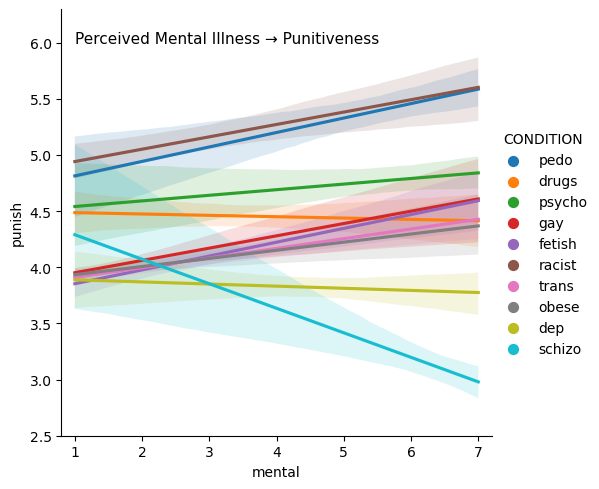

In [3]:
mp = sns.lmplot(
    data = MI_all,
    x = "mental", y = "punish", hue = "Condition",
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mp.set(xlim = (0.8,7.2), ylim = (2.5, 6.3))

mp.add_legend(legend_data = mp._legend_data,
             title = 'CONDITION',)

for lh in mp._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
plt.text(1, 6, 'Perceived Mental Illness → Punitiveness', fontsize = 11)

# plt.savefig('....pdf', dpi = 300) 

# mp

plt.show(mp)

# legend = plt.legend(
#     handles = handles, 
#     bbox_to_anchor = (1.02, 0.73), loc ='upper left', borderaxespad = 0, 
#     title = 'CONTROL')

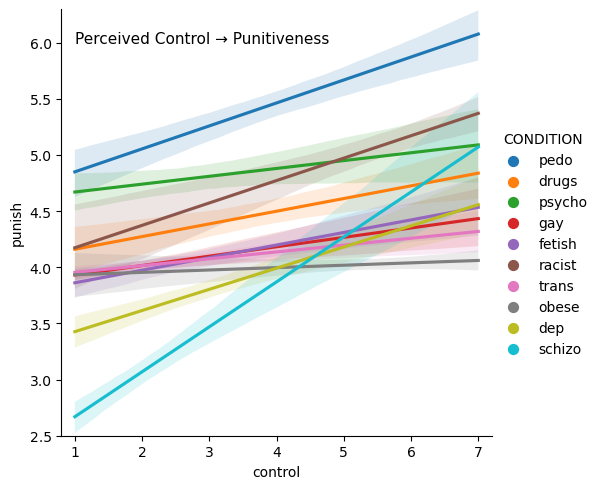

In [4]:
cp = sns.lmplot(
    data = MI_all,
    x = "control", y = "punish", hue = "Condition",
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
cp.set(xlim = (0.8,7.2), ylim = (2.5, 6.3))

cp.add_legend(legend_data = cp._legend_data,
             title = 'CONDITION',)

for lh in cp._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
plt.text(1, 6, 'Perceived Control → Punitiveness', fontsize = 11)

# plt.savefig('....pdf', dpi = 300) 

# cp

plt.show(cp)

In [5]:
import statsmodels.formula.api as smf

# mw_model = smf.ols(formula = 'punish ~ mental + wrong', data = MI_all).fit()
# mw_summary = mw_model.summary()
# print(mw_summary.tables[0], mw_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ mental + wrong + mental:wrong', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     441.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.38e-253
Time:                        13:05:26   Log-Likelihood:                -7276.5
No. Observations:                4888   AIC:                         1.456e+04
Df Residuals:                    4884   BIC:                         1.459e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================== ================================================================================
                   coef    std err          t     

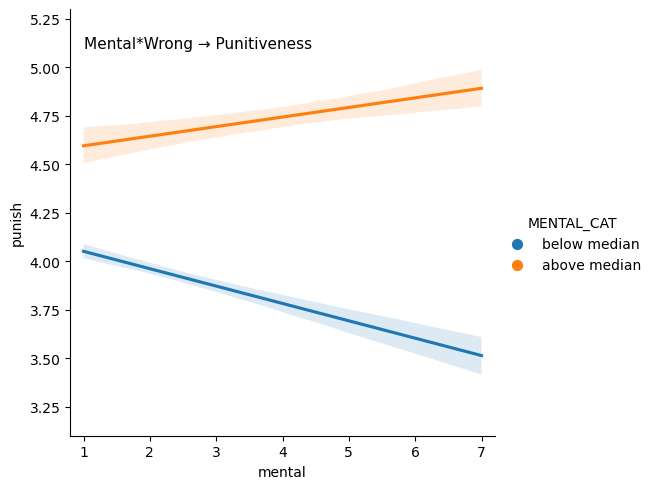

In [6]:
MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, 'below median', 'above median')

mw = sns.lmplot(
    data = MI_all, 
    x = 'mental', y = 'punish', hue = 'wrong_med', 
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mw.set(xlim = (0.8,7.2), ylim = (3.1, 5.3))

mw.add_legend(legend_data = mw._legend_data,
             title = 'MENTAL_CAT',)

for lh in mw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
plt.text(1, 5.1, 'Mental*Wrong → Punitiveness', fontsize = 11)

# plt.savefig('....pdf', dpi = 300) 

# mw

plt.show(mw)

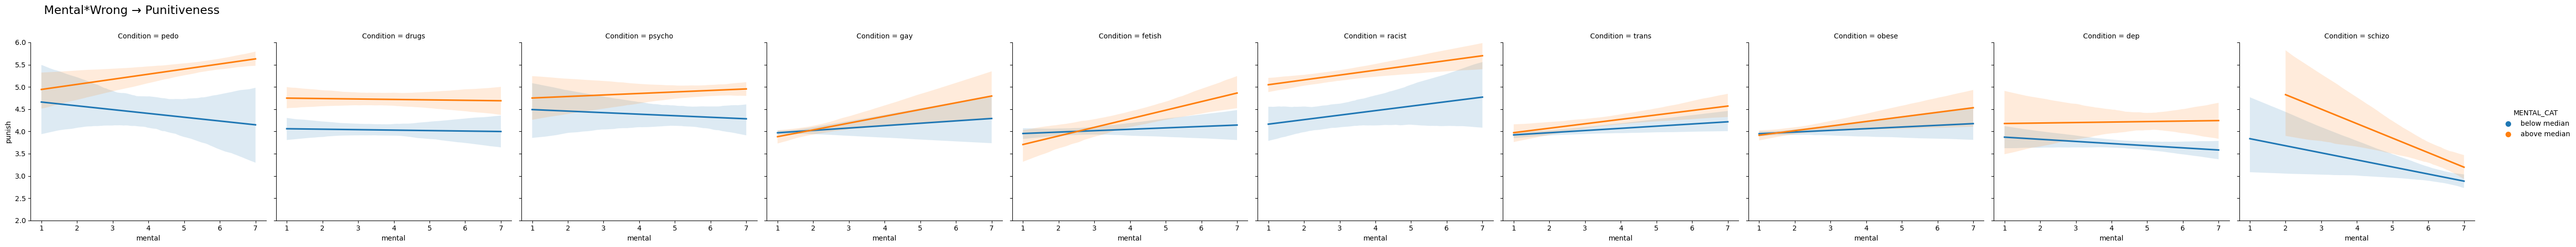

In [7]:
mw = sns.lmplot(
    data = MI_all, 
    x = 'mental', y = 'punish', col = 'Condition', hue = 'wrong_med', 
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mw.set(ylim = (2, 6))

mw.add_legend(legend_data = mw._legend_data,
             title = 'MENTAL_CAT',)

for lh in mw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 

mw.fig.suptitle('Mental*Wrong → Punitiveness', x = 0.05, y = 0.98, size = 17)
mw.fig.subplots_adjust(top = .83)

# plt.savefig('mw-p_allconditions.pdf', dpi = 300) 

# mw

plt.show(mw)

In [8]:
cw_model = smf.ols(formula = 'punish ~ control + wrong', data = MI_all).fit()
cw_summary = cw_model.summary()
cw_summary.tables[1]

model_interaction = smf.ols(formula = 'punish ~ control + wrong + control:wrong', data = MI_all).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.5019,0.057,61.136,0.000,3.390,3.614
control,-0.0334,0.018,-1.834,0.067,-0.069,0.002
wrong,0.1124,0.013,8.745,0.000,0.087,0.138
control:wrong,0.0264,0.003,7.620,0.000,0.020,0.033


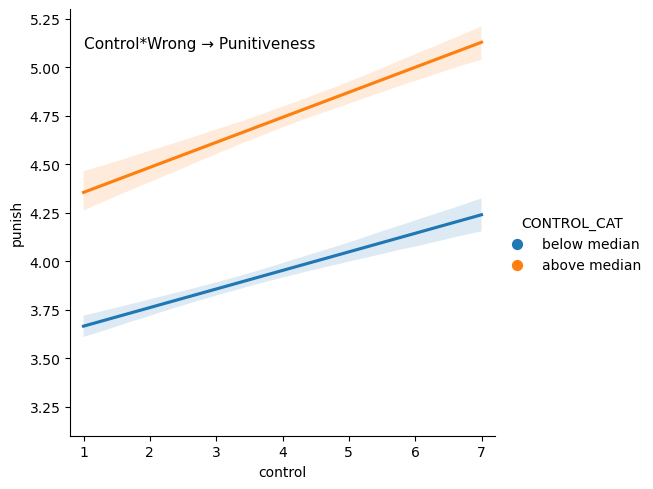

In [9]:
MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, "below median", "above median")

cw = sns.lmplot(
    data = MI_all, 
    x = 'control', y = 'punish', hue = 'wrong_med', 
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
cw.set(xlim = (0.8,7.2), ylim = (3.1, 5.3))

cw.add_legend(legend_data = mw._legend_data,
             title = 'CONTROL_CAT',)

for lh in cw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
plt.text(1, 5.1, 'Control*Wrong → Punitiveness', fontsize = 11)

# plt.savefig('....pdf', dpi = 300) 

# cw

plt.show(cw)

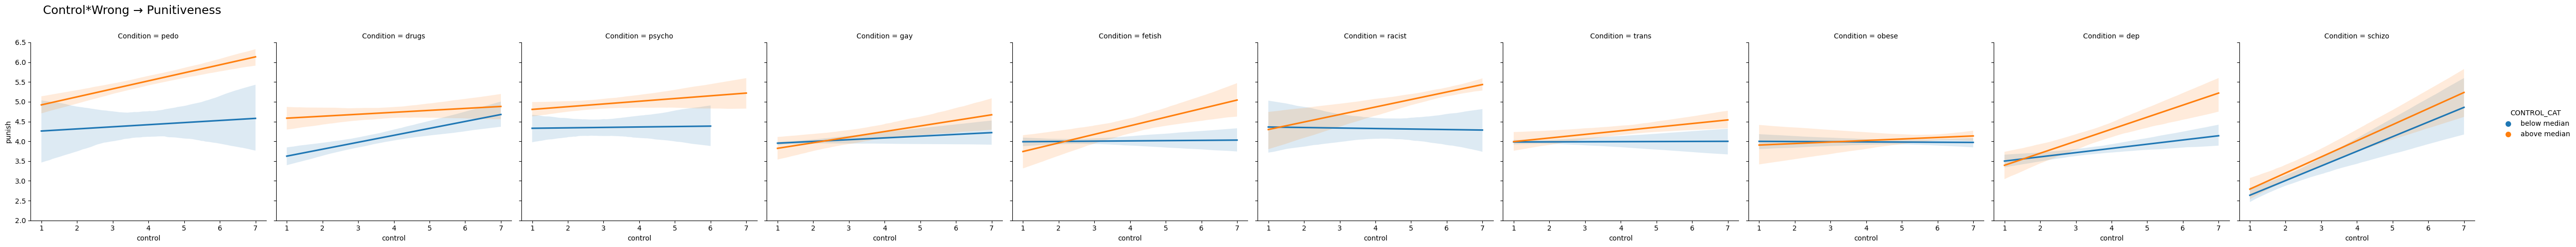

In [17]:
MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, 'below median', 'above median')

cw = sns.lmplot(
    data = MI_all, 
    x = 'control', y = 'punish', col = 'Condition', hue = 'wrong_med', 
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
cw.set(ylim = (2, 6.5))

cw.add_legend(legend_data = mw._legend_data,
             title = 'CONTROL_CAT',)

for lh in cw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 

cw.fig.suptitle('Control*Wrong → Punitiveness', x = 0.05, y = 0.98, size = 17)
cw.fig.subplots_adjust(top = .83)

# plt.savefig('....pdf', dpi = 300) 

# cw

plt.show(cw)

In [52]:
# MI_gay = pd.read_csv('/Users/merieldoyle/Desktop/CK/separate_conditions/gay.csv', index_col = False)
# MI_gay = pd.DataFrame(MI_gay)

# gw_model = smf.ols(formula = 'punish ~ mental + wrong', data = MI_gay).fit()
# gw_summary = mw_model.summary()
# gw_summary.tables[1]

# model_interaction = smf.ols(formula = 'punish ~ mental + wrong + mental:wrong', data = MI_gay).fit()
# summary = model_interaction.summary()
# summary.tables[1]

# MI_gay['wrong_med'] = MI_gay.wrong > MI_gay.wrong.median()
# MI_gay['wrong_med'] = np.where(MI_gay.wrong_med == False, "Below Median", "Above Median")
# sns.lmplot(x = 'mental', y = 'punish', hue = 'wrong_med', data = MI_gay)



# MI_fetish = pd.read_csv('/Users/merieldoyle/Desktop/CK/separate_conditions/fetish.csv', index_col = False)
# MI_fetish = pd.DataFrame(MI_fetish)

# fw_model = smf.ols(formula = 'punish ~ mental + wrong', data = MI_fetish).fit()
# fw_summary = mw_model.summary()
# fw_summary.tables[1]

# model_interaction = smf.ols(formula = 'punish ~ mental + wrong + mental:wrong', data = MI_fetish).fit()
# summary = model_interaction.summary()
# summary.tables[1]

# MI_fetish['wrong_med'] = MI_fetish.wrong > MI_fetish.wrong.median()
# MI_fetish['wrong_med'] = np.where(MI_fetish.wrong_med == False, "Below Median", "Above Median")
# sns.lmplot(x = 'mental', y = 'punish', hue = 'wrong_med', data = MI_fetish)